# Fractional Brownian Motion Parameter Estimation Using Variance Aggregation

Consider a time series of $n$, identically distributed samples,</br>

$
\begin{align}
X_1, X_2,X_3,\ldots,X_n
\end{align}
$

Divide the series into $d$ smaller series of length $m$ where $md=n$.\ and let,</br>
$k = 0,1,2,3,\ldots,d-1$ and define the aggregated sum by,

$
\begin{align}
X_k^m &= \frac{1}{m}\left( X_{km+1} + X_{km+2} + \cdots + X_{km+m-1} + X_{km+m} \right) \\
&= \frac{1}{m} \left( X_{km+1} + \cdots + X_{(k+1)m} \right) \\
&= \frac{1}{m} \sum_{i=km+1}^{(k+1)m} X_i
\end{align}
$

The aggregated mean is given by,

$
\begin{align}
\text{E}[X^m] &= \frac{1}{d}\sum_{i=1}^d X_i^m \\
&= \frac{1}{dm} \sum_{i=1}^d \sum_{j=im+1}^{(k+1)i} X_j \\
&= \frac{1}{n} \sum_{i=1}^n X_i
\end{align}
$

and the aggregated variance by,

$
\begin{align}
\text{Var}[X^m] = \frac{1}{d} \sum_{i=1}^d\left( X^m_i - \text{E}[X^m] \right)^2
\end{align}
$

This method makes use of the self similarity of fractional brownian motion. Consider the aggregated process,

$
\begin{align}
X_0^m = \frac{1}{m} \sum_{i=1}^m X_i
\end{align}
$

From self similarity of fractional brownian motion,

$
\begin{align}
X_{ai} \sim a^H X_i
\end{align}
$

Since the distribution of the sum of Gaussian random variables is the distribution of the last it follows that,</br> 

$
\begin{align}
X_0^m \sim \frac{1}{m} X_m \sim \frac{m^H}{m} X_1 = m^{H-1} X_1
\end{align}
$

For fractional brownian noise,

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z^H_t] = \Delta t^{2H}
\end{align}
$

$X_1$ is a single increment of brownian motion it follows that,

$
\begin{align}
\text{Var}[X_1] = \Delta t^{2H} = \sigma^2
\end{align}
$

so,

$
\begin{align}
\text{Var}[X_0^m] = \text{Var}[m^{H-1} X_1] = m^{2(H-1)}\text{Var}[X_1] = \sigma^2 m^{2(H-1)}
\end{align}
$

From stationarity of it follows that,

$
\begin{align}
\text{Var}[X_k^m] = \sigma^2 m^{2(H-1)}
\end{align}
$

It follows that $H$ can be determined by using OLS on $\text{Var}[X_k^m]$ as a function of $m$.

## Imports

In [25]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (DataType, DataFunc, SourceType, DataSource, PlotType, EstType)
from lib import (curve, stack, single_var, perform_est)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [26]:
Δt = 1.0
npts = 2**10
nagg = 100
m_vals = [1, 10, 50]

def agg_comparison(fbm, H):
    title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
    labels = [f"m={m}" for m in m_vals]
    params = [{"m": m} for m in m_vals]
    m_scan = DataFunc.apply_parameter_scan(fbm, DataType.AGG, *params)
    stack(m_scan, ylim=[-3.5, 3.5], title=title, labels=labels)

## Simulation $H=0.8$

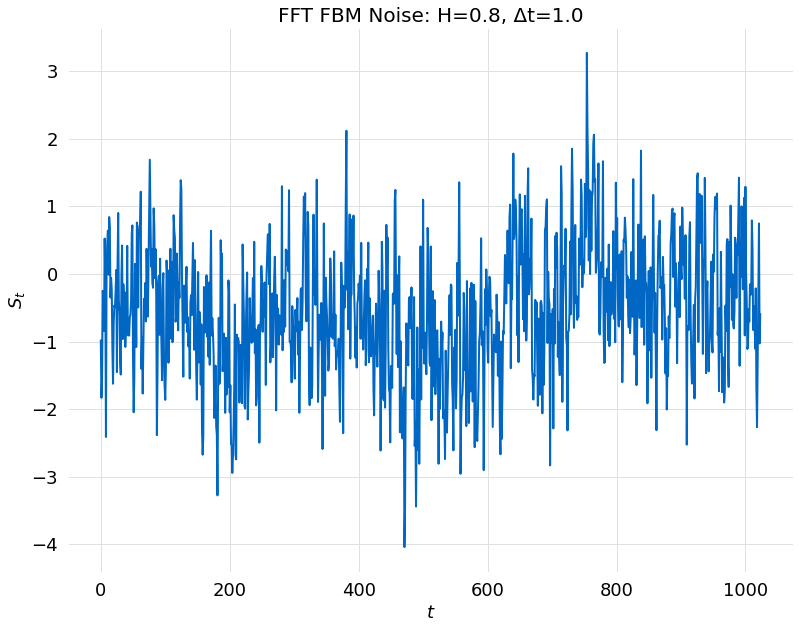

In [27]:
H = 0.8
fbm = DataSource.create_source_type(SourceType.FBM_NOISE_FFT, H=H, npts=npts)
curve(fbm)

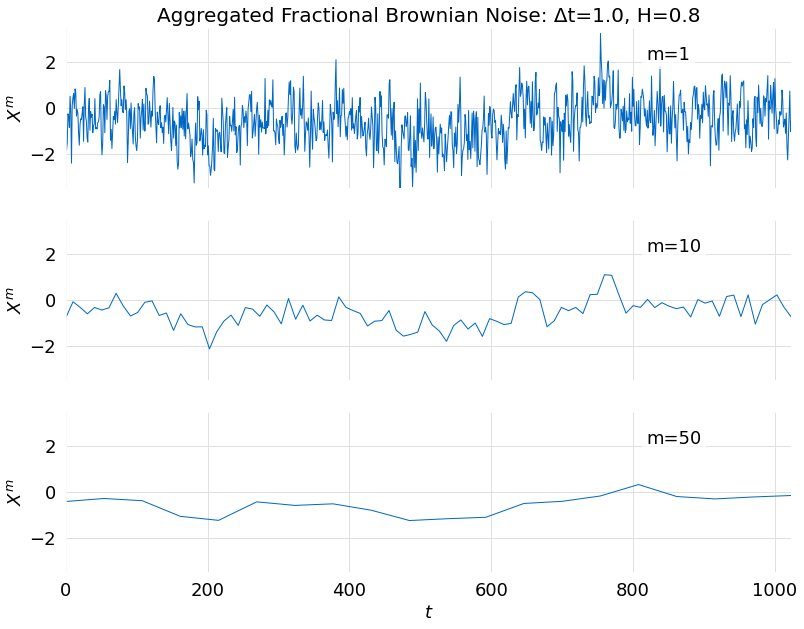

In [29]:
agg_comparison(fbm, H)

In [4]:
m_vals = logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS_fit(agg_var, m_vals, RegType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1057.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.63e-54
Time:                        11:43:29   Log-Likelihood:                 139.79
No. Observations:                 100   AIC:                            -275.6
Df Residuals:                      98   BIC:                            -270.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3444      0.031     10.951      0.000       0.282       0.407
x1            -0.6667      0.021    -32.518      0.000      -0.707      -0.626
==============================================================================
Omnibus:                       27.107   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.916
Skew:                          -0.961   Prob(JB):                     4.86e-15
Kurtosis:                       6.482   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

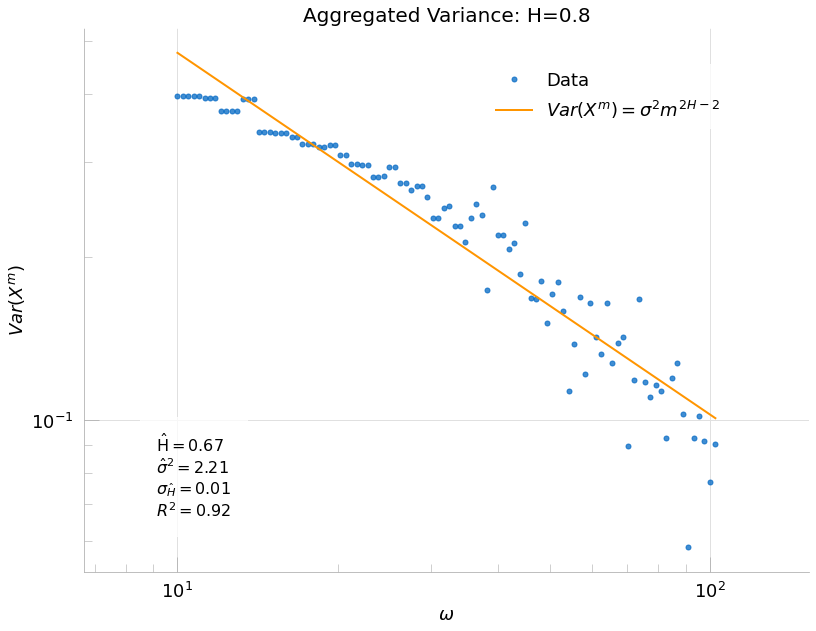

In [5]:
title = title = f"Aggregated Variance: H={H}"
reg(agg_var, m_vals, results, title=title, plot_type=RegPlotType.FBM_AGG_VAR)

## Simulation $H=0.6$

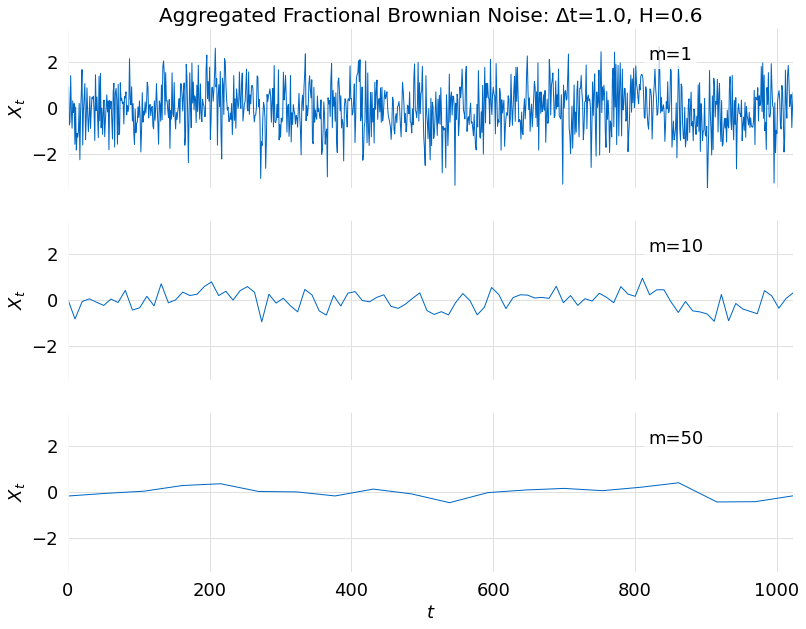

In [6]:
H = 0.6

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

stack(series, ylim=[-3.5, 3.5], x=time, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

In [7]:
m_vals = logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS_fit(agg_var, m_vals, RegType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     988.7
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           5.32e-53
Time:                        11:43:30   Log-Likelihood:                 151.78
No. Observations:                 100   AIC:                            -299.6
Df Residuals:                      98   BIC:                            -294.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2480      0.028     -8.889      0.000      -0.303      -0.193
x1            -0.5719      0.018    -31.444      0.000      -0.608      -0.536
==============================================================================
Omnibus:                        1.599   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                1.416
Skew:                          -0.291   Prob(JB):                        0.493
Kurtosis:                       2.960   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

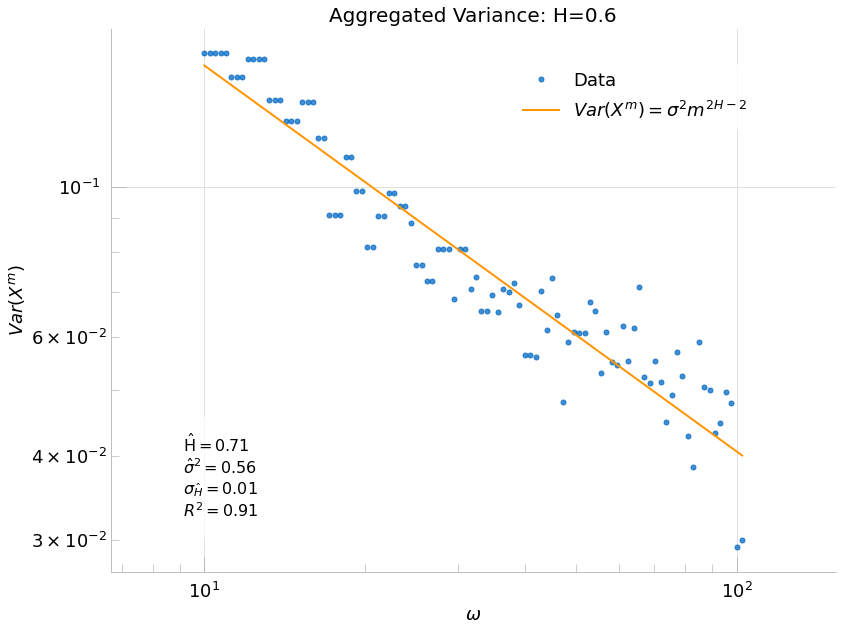

In [8]:
title = title = f"Aggregated Variance: H={H}"
reg(agg_var, m_vals, results, title=title, plot_type=RegPlotType.FBM_AGG_VAR)

## Simulation $H=0.4$

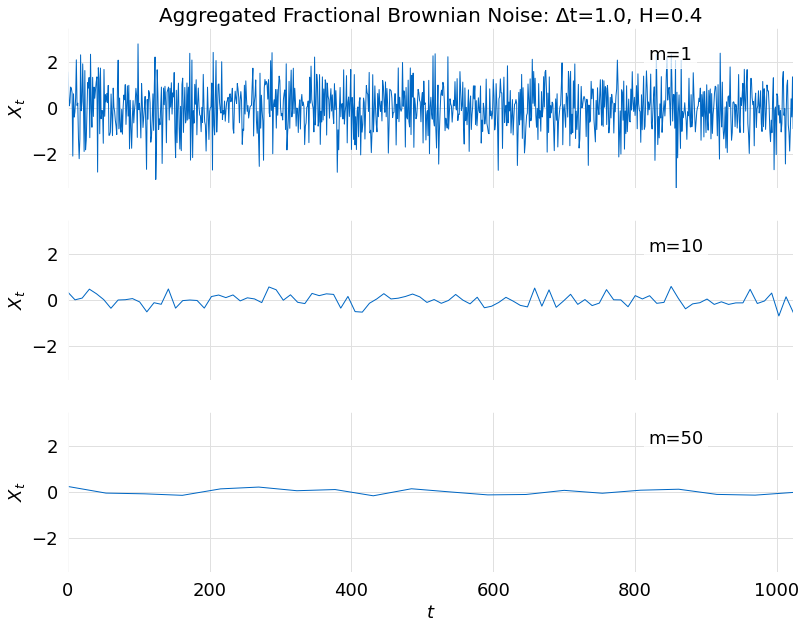

In [9]:
H = 0.4

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

stack(series, ylim=[-3.5, 3.5], x=time, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

In [10]:
m_vals = logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS_fit(agg_var, m_vals, RegType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     2124.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           3.14e-68
Time:                        11:43:30   Log-Likelihood:                 124.93
No. Observations:                 100   AIC:                            -245.9
Df Residuals:                      98   BIC:                            -240.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0259      0.036     -0.711      0.479      -0.098       0.046
x1            -1.0963      0.024    -46.083      0.000      -1.144      -1.049
==============================================================================
Omnibus:                        2.118   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.573
Skew:                          -0.164   Prob(JB):                        0.455
Kurtosis:                       3.519   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

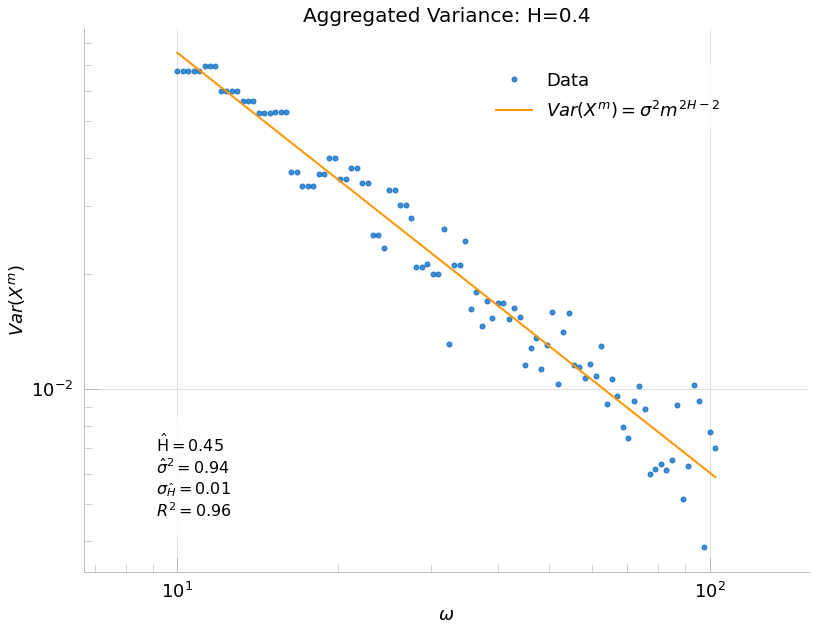

In [11]:
title = title = f"Aggregated Variance: H={H}"
reg(agg_var, m_vals, results, title=title, plot_type=RegPlotType.FBM_AGG_VAR)

## Simulation $H=0.2$

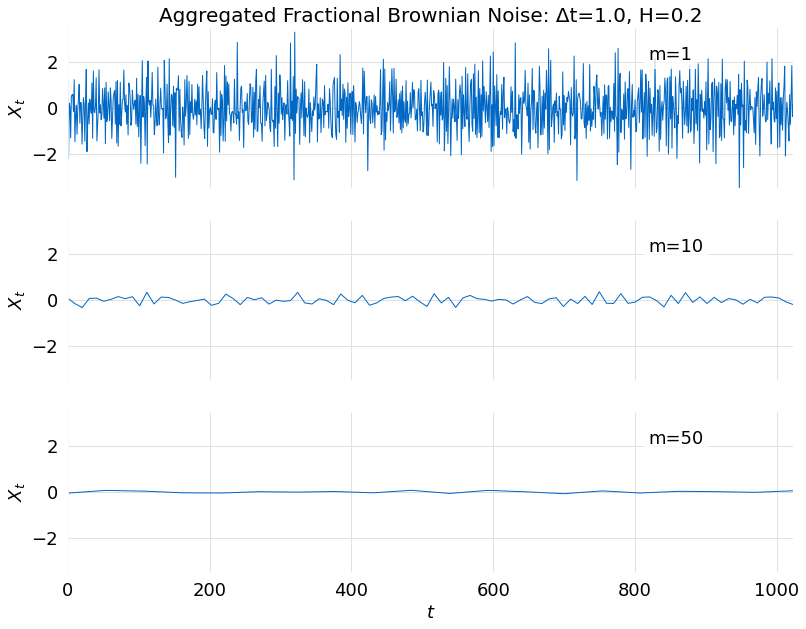

In [12]:
H = 0.2

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

stack(series, ylim=[-3.5, 3.5], x=time, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

In [13]:
m_vals = logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS_fit(agg_var, m_vals, RegType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1599.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.71e-62
Time:                        11:43:31   Log-Likelihood:                 61.640
No. Observations:                 100   AIC:                            -119.3
Df Residuals:                      98   BIC:                            -114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2721      0.069      3.960      0.000       0.136       0.408
x1            -1.7913      0.045    -39.987      0.000      -1.880      -1.702
==============================================================================
Omnibus:                       43.458   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.205
Skew:                          -1.333   Prob(JB):                     2.23e-41
Kurtosis:                       9.150   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

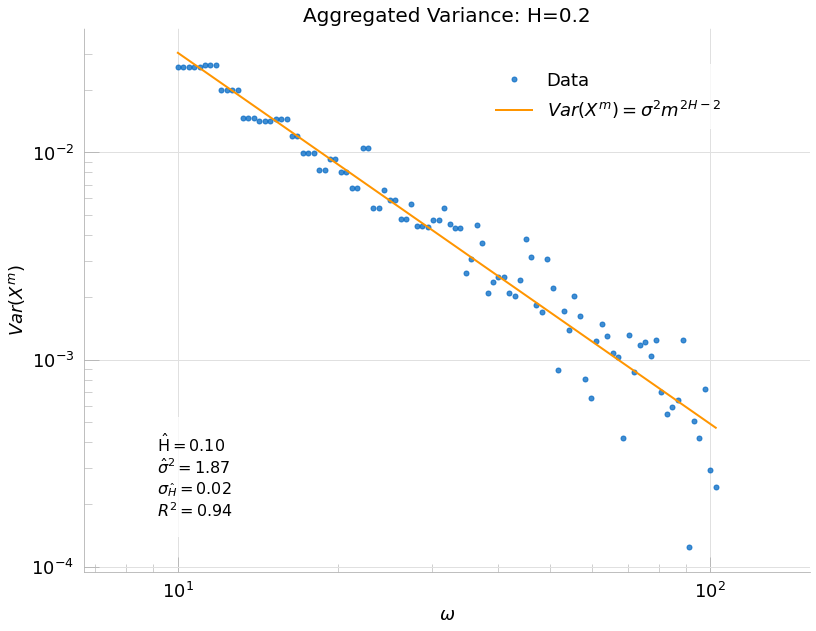

In [14]:
title = title = f"Aggregated Variance: H={H}"
reg(agg_var, m_vals, results, title=title, plot_type=RegPlotType.FBM_AGG_VAR)